Parseamos y estandarizamos los datos de los países de europa

In [68]:
from utils.file_utils import parse_countries_data, standarize_data
import matplotlib.pyplot as plt
attributes, countries, dataset = parse_countries_data("ex_1/resources/europe.csv")
std = standarize_data(dataset)

from ex_1.comparing_parameters import update_learn_rate_constant, update_learn_rate_exp, update_learn_rate_linear, update_radius_constant, update_radius_exp, update_radius_linear

import numpy as np

Parameters

In [69]:
# grilla de salida es de dimensión output_dimension*output_dimension
output_dimension = 3

#nro de epocas
epoch_limit = 7000

# tasa de aprendizaje inicial
initial_learning_rate = 1

# radio inicial
initial_radius = np.ceil(output_dimension/2)

# función de actualización de tasa de aprendizaje
update_learning_rate = update_learn_rate_exp

#función de actualización de radio
update_radius = update_radius_exp

In [70]:
import networks.kohonen as kohonen
import numpy as np
kohonen_network = kohonen.KohonenNetwork(std.shape[1], output_dimension, initial_learning_rate, initial_radius, update_radius, update_learning_rate, random_weights=True)
epochs =[]
errors = []
u_mat = []
def callback_fun(e, error):
    errors.append(error)
    epochs.append(e)
    u_mat.append(np.mean(kohonen_network.u_matrix()))

kohonen_network.train(std, countries, epoch_limit, callback_fun )


<Figure size 2160x2160 with 0 Axes>

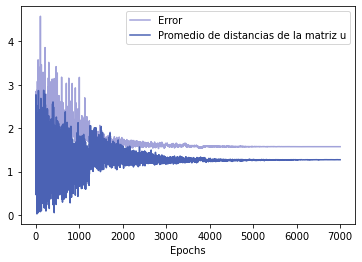

<Figure size 2160x2160 with 0 Axes>

In [71]:
# plot error vs epochs

plt.plot(epochs, errors, color="#a2a3da", label="Error")
plt.xlabel("Epochs")

plt.plot(epochs, u_mat, color="#4b62b4", label="Promedio de distancias de la matriz u")
plt.legend()
plt.figure(figsize=(30, 30))


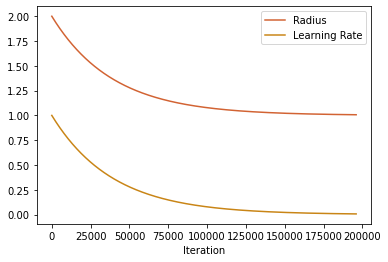

In [72]:

# plot radius values through iterations
plt.plot(range(len(kohonen_network.radius_values)), kohonen_network.radius_values, color="#d26333", label="Radius")
plt.plot(range(len(kohonen_network.learning_rate_values)), kohonen_network.learning_rate_values, color="#c98516", label="Learning Rate")
plt.xlabel("Iteration")
plt.legend()

In [73]:
distances = np.zeros((output_dimension, output_dimension))
heatmap_data = np.zeros((output_dimension, output_dimension))
country_names = [['' for i in range(output_dimension)] for j in range(output_dimension)]
isolated_variables = np.zeros((len(std[0]),output_dimension, output_dimension))
for c,_input in enumerate(std):
    i, j, d = kohonen_network.get_activated_neuron(_input)
    distances[i][j] += d
    heatmap_data[i][j] += 1
    country_names[i][j]+=countries[c]
    for l in range(len(_input)):
        isolated_variables[l][i][j] += std[c][l]

quantization_error = np.sum(distances)/len(std)
print(quantization_error)
print(country_names)

for i in range(output_dimension):
    for j in range(output_dimension):
        distances[i][j] /= heatmap_data[i][j]
        for l in range(len(_input)):
            isolated_variables[l][i][j] /= heatmap_data[i][j]



1.574397826453303
[['AustriaIcelandLuxembourgNetherlandsSwitzerland', 'BelgiumDenmarkIreland', 'Czech RepublicSlovakia'], ['Norway', 'CroatiaPortugalSlovenia', 'HungaryLatviaLithuania'], ['FinlandGermanyItalySpainSwedenUnited Kingdom', 'GreecePoland', 'BulgariaEstoniaUkraine']]


<AxesSubplot:>

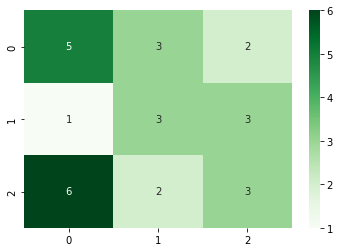

In [74]:
import seaborn as sns

sns.heatmap(heatmap_data, annot=True, cmap="Greens")


<AxesSubplot:>

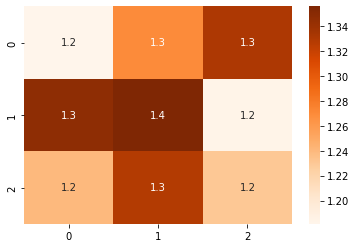

In [75]:
sns.heatmap(kohonen_network.u_matrix(), annot=True, cmap="Oranges")

Plot isolated variables

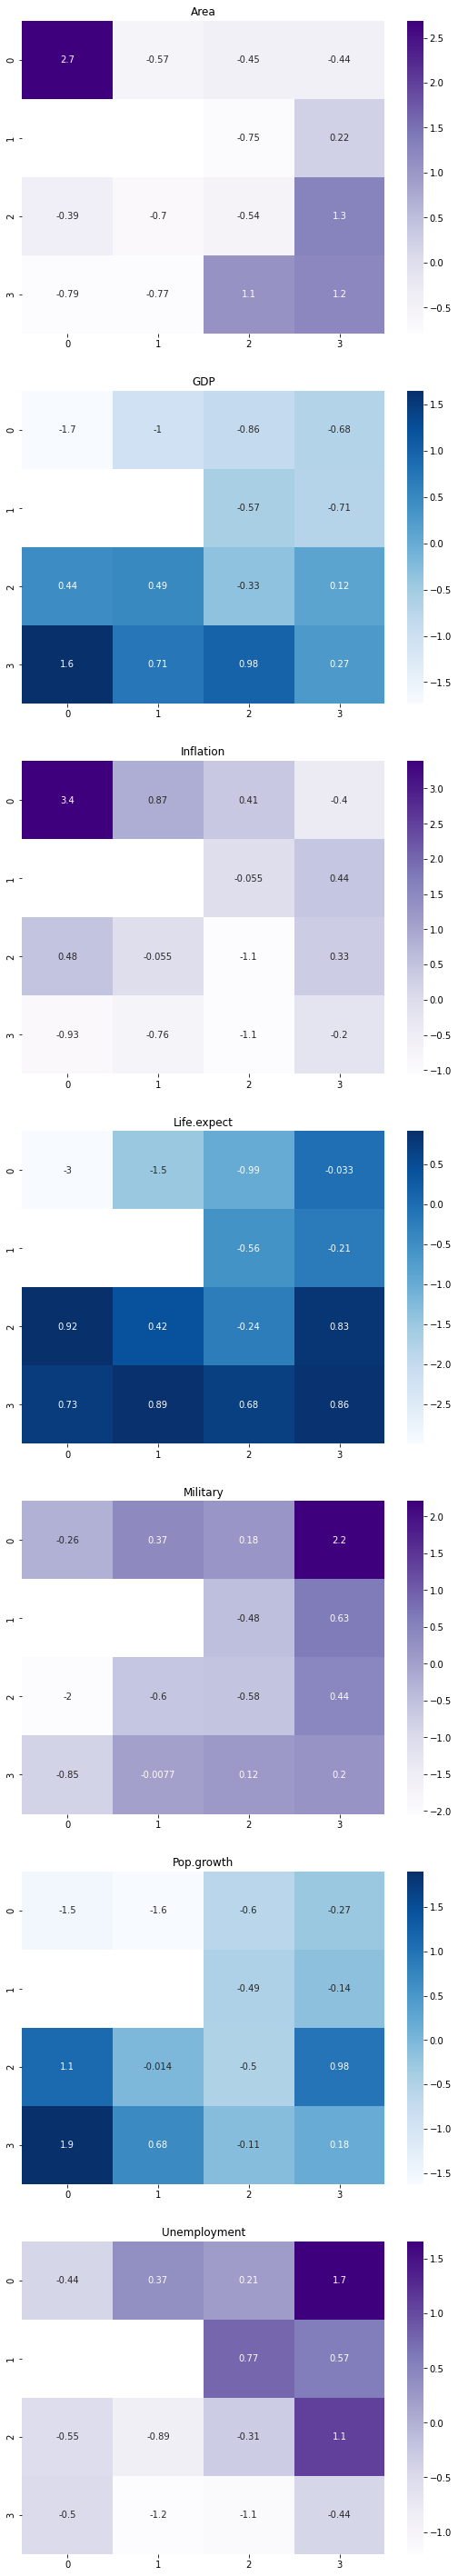

In [53]:
fig, ax = plt.subplots(len(std[0]),1, figsize=(8,40))
for i, var in enumerate(isolated_variables):
    ax[i].set_title(attributes[i])
    if i%2 == 0:
        cmap = "Purples"
    else:
        #turquoise
        cmap = "Blues"
    sns.heatmap(var, annot=True, ax=ax[i], cmap=cmap)
fig.tight_layout(pad=3.0)

In [77]:
execution_count = 1
# compare output dimension values
output_dim_values = range(2, 7)

update_radius_fns = [update_radius_constant, update_radius_linear, update_radius_exp]
update_learning_rate_fns = [update_learn_rate_constant, update_learn_rate_linear, update_learn_rate_exp]

attributes, countries, dataset = parse_countries_data("ex_1/resources/europe.csv")
std = standarize_data(dataset)

#nro de epocas
epoch_limit_values = [3.5*10, 7*10, 3.5*100, 7*100, 3.5*1000, 7*1000]

# dimension de input
input_dim = len(attributes)

# tasa de aprendizaje inicial
initial_learning_rate = 1
output_dimension = 3

# función de actualización de tasa de aprendizaje
update_learning_rate = update_learn_rate_exp

#función de actualización de radio
update_radius = update_radius_exp
q_errors = [list()]*len(epoch_limit_values)
u_matrix_avg = [list()]*len(epoch_limit_values)
for z, epoch_limit in enumerate(epoch_limit_values):
    # radio inicial
    initial_radius = np.ceil(output_dimension*output_dimension/2)
   
    for j in range(execution_count):
        
        kohonen_network = kohonen.KohonenNetwork(input_dim, output_dimension, initial_learning_rate, initial_radius, update_radius, update_learning_rate, random_weights=False)
        kohonen_network.train(std, countries, epoch_limit, callback=None)
        q_error = kohonen_network.get_quantization_error(std)
        q_errors[z].append(q_error)
        u_mat = np.mean(kohonen_network.u_matrix())
        u_matrix_avg[z].append(u_mat)
        print(f"epoch_limit: {epoch_limit}, execution: {j}, q_error: {q_error}, u_matrix_avg: {u_mat}")

epoch_limit: 35.0, execution: 0, q_error: 1.578114256384385, u_matrix_avg: 1.281537713720378
epoch_limit: 70, execution: 0, q_error: 1.573043193274131, u_matrix_avg: 1.2757720088826945
epoch_limit: 350.0, execution: 0, q_error: 1.5742526421900056, u_matrix_avg: 1.2735372620761767
epoch_limit: 700, execution: 0, q_error: 1.574307918107513, u_matrix_avg: 1.2736492661026437
epoch_limit: 3500.0, execution: 0, q_error: 1.6026741626421155, u_matrix_avg: 1.2225065215983175
epoch_limit: 7000, execution: 0, q_error: 1.6096175350995077, u_matrix_avg: 1.26590584806699


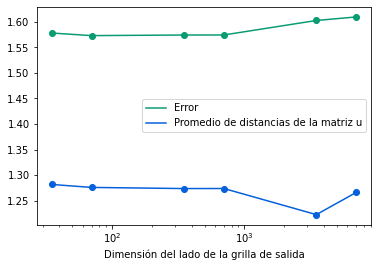

In [79]:
aux_q = np.array_split(q_errors[0], len(epoch_limit_values))
aux_u = np.array_split(u_matrix_avg[0], len(epoch_limit_values))



plt.plot(epoch_limit_values, np.mean(aux_q, axis=1), color="#099c72", label="Error")
plt.errorbar(epoch_limit_values, np.mean(aux_q, axis=1), yerr=np.std(aux_q, axis=1), ecolor = 'grey', elinewidth = 0.5, capsize=1.5, fmt="o", color="#099c72")
plt.xlabel("Dimensión del lado de la grilla de salida")
# plt.ylabel("Error")


plt.plot(epoch_limit_values, np.mean(aux_u, axis=1), color="#0460db", label="Promedio de distancias de la matriz u")
plt.errorbar(epoch_limit_values, np.mean(aux_u, axis=1), yerr=np.std(aux_u, axis=1), ecolor = 'grey', elinewidth = 0.5, capsize=1.5, fmt="o", color="#0460db")
plt.xscale("log")
plt.legend()


In [16]:
update_learning_rate_fns = [update_learn_rate_constant, update_learn_rate_linear, update_learn_rate_exp]

attributes, countries, dataset = parse_countries_data("ex_1/resources/europe.csv")
std = standarize_data(dataset)
output_dimension = 4

initial_radius = np.ceil(output_dimension*output_dimension/2)

#nro de epocas
epoch_limit = 7

# dimension de input
input_dim = len(attributes)

# tasa de aprendizaje inicial
initial_learning_rate = 1

# función de actualización de tasa de aprendizaje
# update_learning_rate = update_learn_rate_exp

#función de actualización de radio
update_radius = update_radius_exp
q_errors = [list()]*len(update_learning_rate_fns)
u_matrix_avg = [list()]*len(update_learning_rate_fns)
for z,update_learning_rate in enumerate(update_learning_rate_fns):
    
    for j in range(execution_count):
     
        kohonen_network = kohonen.KohonenNetwork(input_dim, output_dimension, initial_learning_rate, initial_radius, update_radius, update_learning_rate, random_weights=False)
        kohonen_network.train(std, countries, epoch_limit, callback=None)
        q_error = kohonen_network.get_quantization_error(std)
        q_errors[z].append(q_error)
        u_mat = np.mean(kohonen_network.u_matrix())
        u_matrix_avg[z].append(u_mat)
        print(f"output_dimension: {output_dimension}, execution: {j}, q_error: {q_error}, u_matrix_avg: {u_mat}")



output_dimension: 4, execution: 0, q_error: 1.7448651470553223, u_matrix_avg: 1.7583083645122897
output_dimension: 4, execution: 0, q_error: 1.410297404977383, u_matrix_avg: 1.1512432453941668
output_dimension: 4, execution: 0, q_error: 1.5458941337042338, u_matrix_avg: 0.901836186529073


[0. 0. 0.]


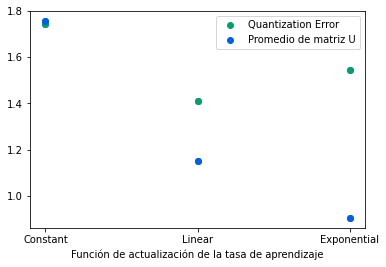

In [18]:
print(np.std(q_errors, axis=0))
x_axis = list(range(len(update_learning_rate_fns)))
plt.scatter(x_axis, np.mean(q_errors, axis=0), label="Quantization Error", color="#099c72")
plt.errorbar(x_axis, np.mean(q_errors, axis=0), yerr=np.std(q_errors, axis=0), ecolor = 'grey', elinewidth = 0.5, capsize=1.5, fmt="o", color="#099c72")

plt.scatter(x_axis, np.mean(u_matrix_avg, axis=0), label="Promedio de matriz U", color="#0460db")
plt.errorbar(x_axis, np.mean(u_matrix_avg, axis=0), yerr=np.std(u_matrix_avg, axis=0), ecolor = 'grey', elinewidth = 0.5, capsize=1.5, fmt="o", color="#0460db")

plt.xlabel("Función de actualización de la tasa de aprendizaje")
plt.xticks(x_axis, ["Constant", "Linear", "Exponential"])
plt.legend()